In [1]:
# numpy 사용안하고 짠 코드

import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
home = []
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
for row in data:
    if name in row[0]:
        for i in row[3:]:
            if ',' in i:
                i=i.replace(',','')  # 이거 추가해서 숫자에 , 들어가있는 것 제거가능. 근데 결국 아래 numpy 이용해서 할 때는 이거 적용하는 방법 모르겠어서 csv 파일 상에서 , 제거함.
            home.append(int(i))
print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신림동
[72, 58, 60, 53, 47, 37, 35, 39, 39, 42, 36, 35, 37, 38, 35, 28, 52, 47, 85, 149, 237, 324, 434, 689, 843, 1055, 1155, 1275, 1030, 958, 899, 733, 723, 589, 517, 577, 482, 433, 388, 338, 268, 269, 277, 236, 232, 239, 225, 222, 210, 218, 177, 151, 177, 167, 178, 170, 178, 191, 190, 196, 175, 191, 159, 154, 155, 128, 122, 120, 109, 116, 114, 127, 94, 82, 90, 78, 115, 81, 62, 55, 48, 40, 34, 37, 33, 17, 21, 6, 14, 12, 6, 9, 3, 6, 2, 1, 1, 2, 2, 3, 15]


In [7]:
# numpy 사용해서 수정한 코드

import csv
import numpy as np
f = open('age.csv')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)  # numpy array 로 만드는 방법은 이렇게 간편함! 자료형도 dtype으로 지정 가능
print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신림동
[  71   67   69   59   43   47   41   45   45   39   42   33   39   37
   36   54   44   70   84  166  199  309  400  619  807  971 1099  987
  998  880  839  731  656  585  587  557  472  403  347  301  271  287
  230  271  254  216  237  209  219  154  161  186  152  189  164  165
  198  207  176  168  193  151  176  144  128  128  117  133  115  126
  138   82   94   85   91  126   80   60   76   47   44   37   39   38
   17   21   12   14   14    9    8    6    5    2    5    3    3    2
    1    1   15]


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신림동


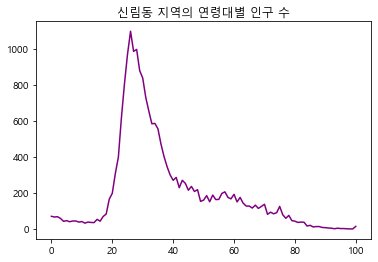

In [11]:
# numpy 사용해서 수정한 코드

import csv
import numpy as np
f = open('age.csv')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title(name+' 지역의 연령대별 인구 수')
plt.plot(home, color='purple')
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 수지구


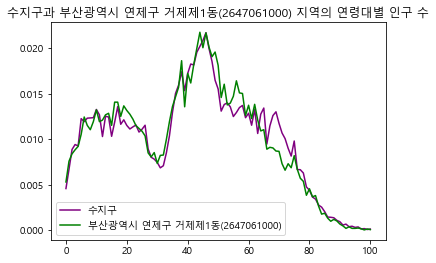

In [14]:
import csv
import numpy as np
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)  # 이걸 해둬야 앞에서 home 에 해당하는 데이터 저장한 후에도 다시 data 쭉 훑으면서 탐색 가능함.
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
result = ''
min = 1
result_array = 0  # 차이 최소인 지역의 연령대별 인구 비율 저장할 배열 생성 및 초기화

for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)/int(row[2])
for row in data:    
    away = np.array(row[3:],dtype=int)/int(row[2])
    if 0 < np.sum(abs(home-away)) < min:  # 0 나오면 home이랑 같은 데이터인거라서 뺴주려고 0보다 커야 한다는 조건 추가. abs는 절댓값 구하는거
        min = np.sum(abs(home-away))
        result = row[0]
        result_array = away
        
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title(name+'과 '+result+' 지역의 연령대별 인구 수')
plt.plot(home, label=name, color='purple')
plt.plot(result_array, label=result, color='green')
plt.legend()
plt.show()